<img align="left" width="800" src="https://cdn-images-1.medium.com/max/1000/1*C8hNiOqur4OJyEZmC7OnzQ.png">


 ### For learning how to import dataset directly from Kaggle into Colab watch video in below link  
 
 https://drive.google.com/file/d/1-5R2dhXUkFA5VGqrzpgwZRHYQa8v3RLw/view?usp=sharing

## Uncomment below cells and run all of them

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


### From Kaggle website from your account page generate API Token then download and store the kaggle.json file into the same directory of this notebook.

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

### copy the API command for the dataset you want to download from kaggle dataset page

In [5]:
!kaggle datasets download -d andrewmvd/animal-faces

animal-faces.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
! unzip animal-faces.zip

Archive:  animal-faces.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of animal-faces.zip or
        animal-faces.zip.zip, and cannot find animal-faces.zip.ZIP, period.


# Table of contents
1. Why there is need of Image preprocessing?
2. What is Image augmentation?
3. What Preprocessing and Augmentation Steps Should Be Used?
4. Image preprocessing using ImageDatagenerator
5. Steps for augmenting
    1. Read Image
    2. Plot the sample image chosen
    3. Setting the type of augmentation to perform
    4. Perform augmentation on chosen image 
    5. Iterating through aug_iter and making a list of images we want to plot. 
    6. Finally plot the augmented images 

6. Some types of augmentation
    1. Width/height Shift
    2. Random Flips
    3. Random Exposure
    4. Random Zoom
    5. Channel Shift

7. Using Flow_from_directory method
    1. Why we need to resize the image?
    2.  What is batch size?
    3. Class mode in flow_from_directory method
    4. Color transformation

8. ploting the generated images above flow_from_directory method

9. Feedback Form

# Why there is need of Image preprocessing?

For training a model and making prediction on new data, images size must match the input size of neural network. Also there is one problem that if the dataset has less number of samples than the model will not perform well does we need to increase the datatset. We can achieve this by Image augmentation. We need to scale all the images to reduce computation cost. It is not limited to, resizing, orienting, and color corrections.



# What is Image augmentation?

A deep learning model generally works well when it has a huge amount of data. In general, the more data we have better will be the performance of the model.
Image augmentation deals with less datatset size by generating multiple images from existing images. 

Image augmentation are manipulations applied to images to create different versions of similar content in order to expose the model to a wider array of training examples. For example, randomly altering rotation, brightness, or scale of an input image requires that a model consider what an image subject looks like in a variety of situations.


# Note:

Image augmentation manipulations are forms of image preprocessing, but there is a huge difference:  
While image preprocessing steps are applied to training and test sets, image augmentation is only applied to the training data.  
Thus, a transformation that could be an augmentation in some situations may best be a preprocessing step in others.

# What Preprocessing and Augmentation Steps Should Be Used?


Identifying the correct preprocessing and augmentation steps most useful for increasing model performance requires a firm understanding of the problem, data collected, and production environment. What may work well in one situation is not appropriate in all others.

Thus, considering techniques and why each may be valuable enables informed decisions.

Changing the size of an image sounds trivial, but there are considerations to take into account.

Many pretrained models accept a particular input size, Moreover, input images may be various sizes, and some may be smaller than the desired input size.

In [7]:
# importing all the necessary for example: tensorflow, ImageDataGenerator, etc
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib


Using matplotlib backend: <object object at 0x7f8398f93460>


In [8]:
# create a function for plotting images with parameter image array
def plot_images(image_arr):
  # create a subplot of 9 images using fig, axes
  fig, axes = plt.subplots(3, 4, figsize=(6,6))
 
  # flatten the axes 
  axes = axes.flatten()
  # loop through image array and axes simultaneously using zip function
  for image, ax in zip(image_arr, axes):
    #print('image:',image, 'ax:',ax)
    # show image using imshow()
    ax.imshow(image)
    ax.axis('off')

  
  # tighten the layout to avoid white space between images
  plt.tight_layout()
  # display the subplot 
  plt.show()


# Image preprocessing using ImageDatagenerator

let assume that we want to augment a image so if we do it manually by writing python scripts for all it will be so time consuming, energy consuming and tough to do.

But no worries...

<img width="400" src="https://media4.giphy.com/media/z23hGvopHu7w4/giphy.gif">  








We have ImageData generator. It is a class in Keras which is used for implementing image augmentation. The major advantage of the Keras ImageDataGenerator class is its ability to produce real-time image augmentation. The data can be augmnented during training time making the overal model more robust and accurate.


### For reference you can visit official documentation:

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [9]:
# just uncomment below code and run the cell we will discuss about this below in this notebook 
#------------------------------------------------------------------------

# create variable to store ImageDataGenerator reference
gen = ImageDataGenerator(
    rotation_range=10, 
    width_shift_range=0.1, 
    height_shift_range=0.1,
    zoom_range=0.3, 
    channel_shift_range=10, 
    brightness_range=[0.5,1.5],
    horizontal_flip=True,
    vertical_flip=True)

# 1. Read Image

Read the images from the dataset  directory 

In [10]:
import os, random
# chose a random image from directory using random.choice(os.listdir(image_folder path))
choosen_image = random.choices(os.listdir('/content/afhq/train/cat'))

# print the chosen image
print(choosen_image)

['pixabay_cat_004517.jpg']


In [11]:
# create a image path varibale to store concatenation of image folder path + chosen image name 
image_path = '/content/afhq/train/cat/' + choosen_image[0]
print(image_path)

/content/afhq/train/cat/pixabay_cat_004517.jpg


# 2. Plot the sample image chosen

just plot the image chosen in above cells using matplotlib

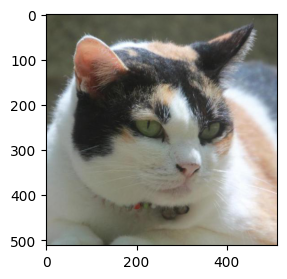

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(3,3))
# read image from path and expand dims with axis 0 and store the result in image named variable
image = np.expand_dims(plt.imread(image_path), 0)
#print(image)
# plot the image using plt.imshow()
plt.imshow(image[0])
plt.show()

# 3. Setting the type of augmentation to perform

In [13]:
# create variable to store ImageDataGenerator reference
data_gen = ImageDataGenerator(rotation_range=30)

# 4. Perform augmentation on chosen image 

In [14]:
# pass the image to image generator valriable ie. gen.flow(image) and store the result in aug_iter variable
aug_iter = data_gen.flow(image)

# Note:
The out put of ImageDataGenerator is NumpyArrayIterator

Basicaly, iterating means going through elements one by one.

As we deal with multi-dimensional arrays in numpy, we can do this using basic for loop of python.

so for 1 dimensional array we just need to use one for loop but for multi-dimensional array we need to us multiple for loops whic can be difficult to write for arrays with very high dimensionality.

For more information visit official documentation:

#### https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/NumpyArrayIterator

In [15]:
# aug_iter values at index 0
print(aug_iter[0].shape)
aug_iter[0]

(1, 512, 512, 3)


array([[[[ 82.41581,  85.41581,  66.41581],
         [ 82.61686,  85.61686,  66.61686],
         [ 82.8179 ,  85.8179 ,  66.8179 ],
         ...,
         [ 81.54335,  83.54335,  69.54335],
         [ 81.     ,  83.     ,  69.     ],
         [ 81.     ,  83.     ,  69.     ]],

        [[ 82.     ,  85.     ,  66.     ],
         [ 82.     ,  85.     ,  66.     ],
         [ 82.     ,  85.     ,  66.     ],
         ...,
         [ 81.34231,  83.34231,  69.34231],
         [ 81.     ,  83.     ,  69.     ],
         [ 81.     ,  83.     ,  69.     ]],

        [[ 81.45665,  84.45665,  65.45665],
         [ 81.65769,  84.65769,  65.65769],
         [ 81.85874,  84.85874,  65.85874],
         ...,
         [ 81.14126,  83.14126,  69.14126],
         [ 81.     ,  83.     ,  69.     ],
         [ 81.     ,  83.     ,  69.     ]],

        ...,

        [[133.     , 148.     , 143.     ],
         [132.83832, 147.83832, 142.83832],
         [131.85873, 146.85873, 141.85873],
         ...,


# 5. Iterating through aug_iter and making a list of images we want to plot.

In [16]:
# create a empty list named aug_images
aug_images = []
# loop in range 9 for 9 images
for i in range(12):
  # append the images from batches to the list converting type to np.uint8
  aug_images.append(next(aug_iter)[0].astype(np.uint8))

In [17]:
type(aug_images)

list

# 6. Finally plot the augmented images 

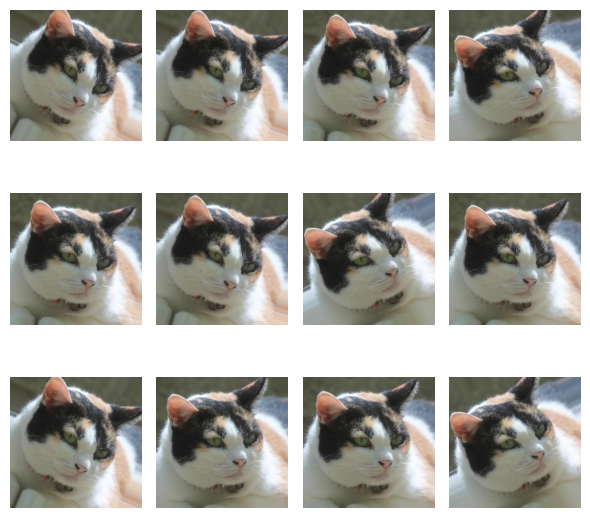

In [18]:
# plot the augmented images using function created at the top
plot_images(aug_images)

The above plot shows augmented images. osmem of them are flipped upside/down or left/right, some of them are zoomed in/out, some of them are darker and some are brighter.

Inshort, we have generated so many images from 1 image.

# Tadaa.....

<img width="400" src="https://c.tenor.com/9LmnPgcizMwAAAAC/done-tada.gif">  


### Finally we succesfully performed  our first augmentation on image

# Now we will try implementating one by one some types of augmentation individually.

The code below is exactly the same we coded in above cell. So just copy and past that code here together with some small changes

# Some types of augmentation

# Width/height Shift

Width shift simply means shifting the image horizontally either lefth orright whereas height shift means shifting the image vertically either to top or bottom. 

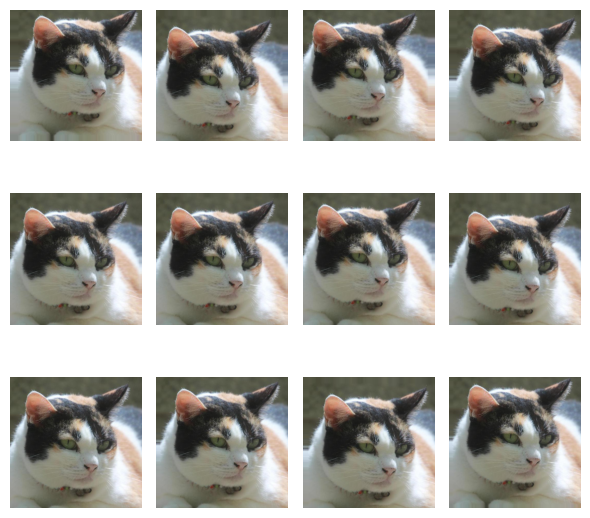

In [19]:
# create variable to store ImageDataGenerator reference with parameteres: width_shift_range, height_shift_range 
gen = ImageDataGenerator(width_shift_range=30, height_shift_range=30)

# pass the image to image generator valriable ie. gen.flow(image) and store the result in generated_images variable
generated_images = gen.flow(image)

# create a empty list named aug_images
aug_images = []

# loop in range 9 for 9 images
for i in range(12):
  # append the images from batches to the list converting type to np.uint8
  aug_images.append(next(generated_images)[0].astype(np.uint8))


# plot the augmented images using function created at the top
plot_images(aug_images)


## Random Flips:

Random fliping means mirroring the images along x-axis and y-axis so that the we can prevent model from just learning to recognize objects from left to right, modle can also learn to recognize from top to bottom, right to left, bottom to top

## Notes:
Flipping images really is a strong way to improve performance of models for real world application. for example: facial recognition.

But it may be illogical in case of text image data. 

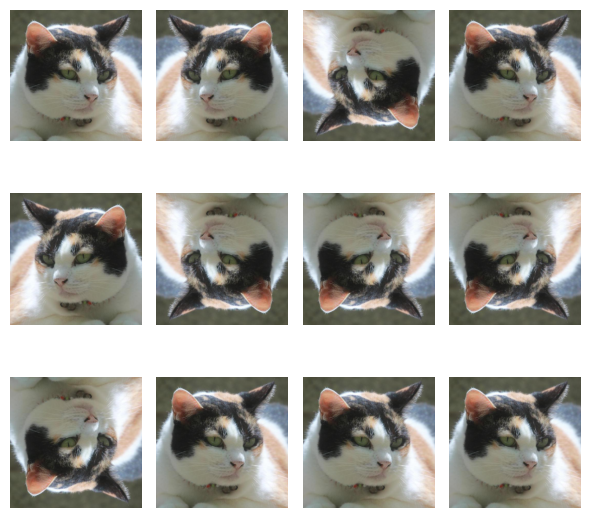

In [20]:
# create variable to store ImageDataGenerator reference with parameters: horizontal_flip, vertical_flip both are boolean
gen = ImageDataGenerator(horizontal_flip=True, vertical_flip= True)

# pass the image to image generator valriable ie. gen.flow(image) and store the result in generated_images variable
generated_images = gen.flow(image)

# create a empty list named aug_images
aug_images = []

# loop in range 9 for 9 images
for i in range(12):
  # append the images from batches to the list converting type to np.uint8
  aug_images.append(next(generated_images)[0].astype(np.uint8))


# plot the augmented images using function created at the top
plot_images(aug_images)

## Random Exposure

Adjusting image brightness to be randomly brighter and darker is most applicable if a model may be required to perform in a variety of lighting settings. It is important to consider the maximum and minimum of brightness in the room.

## Note: 

Adjusting brightness is really helpful since if the model will be used later on in a mobile application. The user may use it in different light settings.


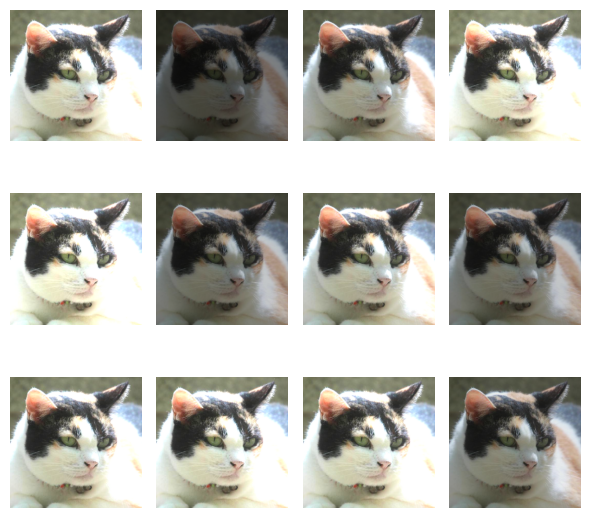

In [21]:
# create variable to store ImageDataGenerator reference with parameter: brightness_range=[min, max]
gen = ImageDataGenerator(brightness_range=[0.5, 2.0])

# pass the image to image generator valriable ie. gen.flow(image) and store the result in generated_images variable
generated_images = gen.flow(image)

# create a empty list named aug_images
aug_images = []

# loop in range 9 for 9 images
for i in range(12):
  # append the images from batches to the list converting type to np.uint8
  aug_images.append(next(generated_images)[0].astype(np.uint8))


# plot the augmented images using function created at the top
plot_images(aug_images)

## Random Zoom

The zoom augmentation either randomly zooms in on the image or zooms out of the image.

ImageDataGenerator class takes in a float value for zooming in the zoom_range argument. You could provide a list with two values specifying the lower and the upper limit. Else, if you specify a float value, then zoom will be done in the range [1-zoom_range,1+zoom_range].

Any value smaller than 1 will zoom in on the image. Whereas any value greater than 1 will zoom out on the image.

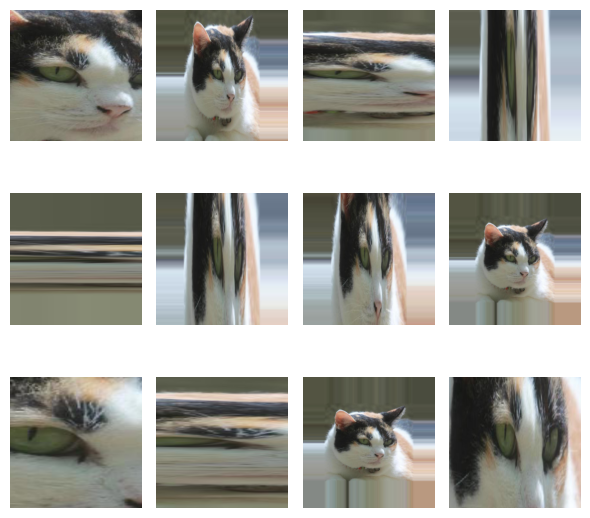

In [22]:
# create variable to store ImageDataGenerator reference with parameter: zoom_range
gen = ImageDataGenerator(zoom_range= 1.0)

# pass the image to image generator valriable ie. gen.flow(image) and store the result in generated_images variable
generated_images = gen.flow(image)

# create a empty list named aug_images
aug_images = []

# loop in range 9 for 9 images
for i in range(12):
  # append the images from batches to the list converting type to np.uint8
  batch = generated_images.next()
  aug_images.append(batch[0].astype(np.uint8))


# plot the augmented images using function created at the top
plot_images(aug_images)

# Channel Shift

The color image have 3 channels rgb whic can be shifted to get variety of images with some color value shift. 

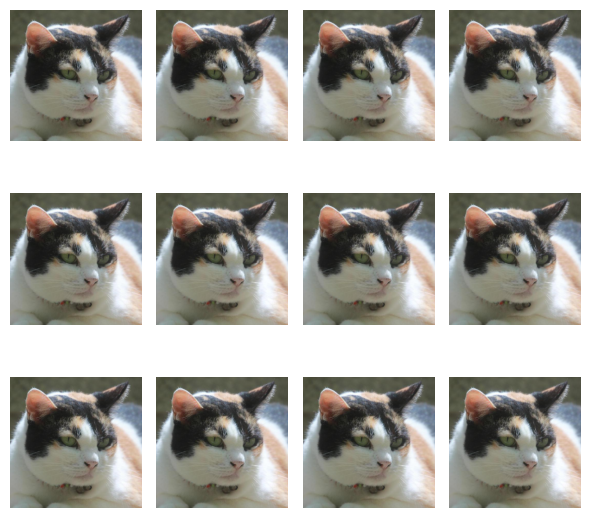

In [23]:
# create variable to store ImageDataGenerator reference with parameter: channel_shift_range
gen = ImageDataGenerator(channel_shift_range=2.0)

# pass the image to image generator valriable ie. gen.flow(image) and store the result in generated_images variable
generated_images = gen.flow(image)

# create a empty list named aug_images
aug_images = []

# loop in range 9 for 9 images
for i in range(12):
 # append the images from batches to the list converting type to np.uint8
  
  aug_images.append(next(generated_images)[0].astype(np.uint8))

# plot the augmented images using function created at the top
plot_images(aug_images)


# Using Flow_from_directory method

Taking image one by one and augmenting is really not what we want right?

So what we can do here is, we can use flow_from_directory method from ImageDataGenerator class to get all the images in a directory and sub directories also we can get the labels for each image by the name of folders or subfolders automatically.
The augmentation take place while the neural network model is learning on the training data.

isn't that cool...?




In [24]:
# set train data path in a variable named train_path
train_path = '/content/afhq/train'

# 1. Why we need to resize the image?

The image dataset we have may contain some images or may be all of them are of different size. The neural net model will on take similar input sized images. thus we need to resize all of the image same as the input size of the neural net.

Uneven image sizes example:

<img width="500" src="https://image.shutterstock.com/image-vector/picture-photo-frames-size-260nw-624837785.jpg">  

We can achieve same size for each image by passing target_size = (size,size)  in flow_from_directory method



# 2.  What is batch size?

The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

Think of a batch as a for-loop iterating over one or more samples and making predictions. At the end of the batch, the predictions are compared to the expected output variables and an error is calculated. From this error, the update algorithm is used to improve the model


A training dataset can be divided into one or more batches.

When all training samples are used to create one batch, the learning algorithm is called batch gradient descent. When the batch is the size of one sample, the learning algorithm is called stochastic gradient descent. When the batch size is more than one sample and less than the size of the training dataset, the learning algorithm is called mini-batch gradient descent.

We can achieve batch size for train dataset by passing batch_size = size  in flow_from_directory method

# 3. Class mode in flow_from_directory method

It labels the images by the folder name as class. for example image in cat folder is labeled as cat. 

You can choose class_mode = 'binary' if you have two classes or else you can use class_mode = 'categorical' if youhave multi class dataset. It will autoencode the labels.


## 4. Color transformation:

It is an example of image transformation that can be applied to all images (train and test) or just in training dataset only as augmentations.  
Generally, grayscaling is a color change applied to all images.  

While we know that more info about the image can improve the model performance thus we can add colors to images converting them from gray scale to rgb.

Color images are stored as red, green, and blue values, whereas grayscale images are only stored as a range of black to white. 

So for grayscale in CNNs, our model only needs to work with one matrix per image, not three.


# Note:

Using rgb images increasing performance of the model.
For example, if you want to classify animals and if a more than one animal has circular spot on their body using grayscale will not result in good prediction whereas rgb will improve the performnace by 3 times.
But for examples where data is simple dice where you just need to recognize the number of dots per dice head you can use grayscale it will work good in this case.



We can achieve color transformation for each image by passing color_mode = 'rgb' or 'grayscale' or 'rgba' in flow_from_directory method


In [25]:
# create variable to store ImageDataGenerator reference with all the values as it was at the top of the notebook
gen = ImageDataGenerator( rotation_range=30, 
                         width_shift_range=0.5,
                         height_shift_range=0.5,
                         brightness_range = [0.5, 1.0], horizontal_flip= True, vertical_flip=True
    
    )


# image size variable named IMAGE_SIZE with size value
IMAGE_SIZE = 234
# batch size variable named BATCH_SIZE with size value
BATCH_SIZE = 32



# uncomment the below code and run the cell 


# create a train_generator named variable which is reference to gen i.e ImageDataGenrator reference used above for augmentation 
train_generator = gen.flow_from_directory(
    train_path, 
    target_size=(IMAGE_SIZE,IMAGE_SIZE), 
    subset='training',
    batch_size= BATCH_SIZE,
    color_mode = 'rgb',
    shuffle=True,
    class_mode='categorical',
    seed=42)

Found 14630 images belonging to 3 classes.


In [26]:
train_generator.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

# ploting the generated images above flow_from_directory method

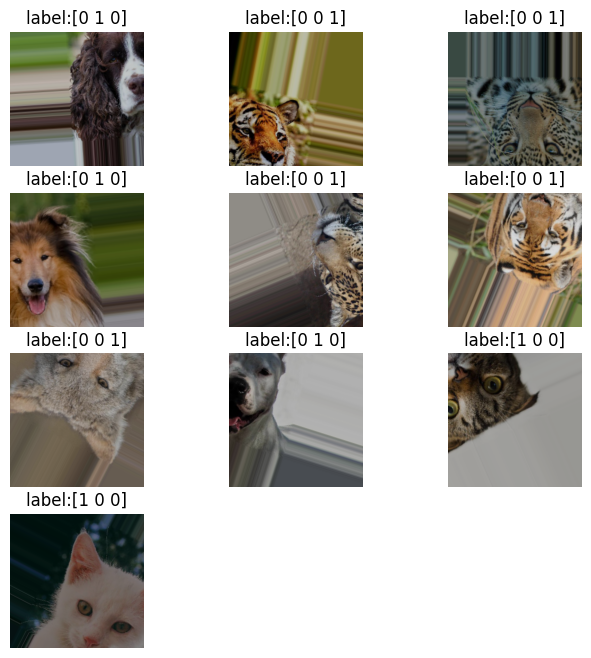

In [29]:
# create two variables x,y which will store values returned by train_generator.next() 
labels = ['cat', 'dog', 'wild']
x, y = train_generator.next()
#print(x,y)
# create figure
fig = plt.figure(figsize=(8,8))

# create loop in range 9 or your choice
for i in range(10):
  # add a subplot to figure of size you want
  fig.add_subplot(4 ,3, i+1)
  # create a image named variable to store ith value of x astype np.uint8
  image = x[i].astype(np.uint8)
  # create a label named variable to store ith value of y astype np.uint8
  label = y[i].astype(np.uint8)
  # plot the image using imshow
  plt.imshow(image)
  # add the title as actual label to image
  plt.title(f'label:{str(label)}')
  plt.axis('off')

# show the image
plt.show()

# Conclusion


## In this assignment, we have learned how to augment computer vision data with different types techniques. We learned some tips about when to use a specific technique and why




<img width="800" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRqnYFJSiOUXBymkNIYio8UJcisQzz8zKpHEM-_uKXNR-uknpYax33V6AplgRfjqYs7IQ&usqp=CAU"> 

# Please fill the below feedback form about this assignment

https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7s